In [1]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

data_dir = '../datasets/artificial_data/'
dataset_name = 'SimpleNoisyCircleImageGenerator'
# dataset_name = 'SimpleNoisyImageGenerator'


resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset_name}', 
    num_epochs=60,
    learning_rate=0.01,
    weight_decay=1e-5,
    early_stopping_tol=30,
    early_stopping_min_delta=10
)


resnet.load_data()
resnet.train()
resnet.evaluate()

Is cuda available:  True
Epoch 1/20, Train Loss: 550849736763412.06, Val Loss: 1616215702276493.8
Epoch 2/20, Train Loss: 1597.236298256732, Val Loss: 4092.2595558166504
Epoch 3/20, Train Loss: 8386.773428085002, Val Loss: 23596.51512670517
Epoch 4/20, Train Loss: 292.25583671001675, Val Loss: 737.3385181128979
Epoch 5/20, Train Loss: 91.80155801773071, Val Loss: 203.15368527173996
Epoch 6/20, Train Loss: 76.71295261383057, Val Loss: 161.5413232445717
Epoch 7/20, Train Loss: 61.49859149405297, Val Loss: 131.04580628871918
Epoch 8/20, Train Loss: 67.21145229643963, Val Loss: 135.99141031503677
Epoch 9/20, Train Loss: 51.402855086833874, Val Loss: 104.18341958522797
Epoch 10/20, Train Loss: 46.87606046047617, Val Loss: 83.44607108831406
Epoch 11/20, Train Loss: 32.09908501898989, Val Loss: 50.65249003469944
Epoch 12/20, Train Loss: 40.29958194113792, Val Loss: 67.25823892652988
Epoch 13/20, Train Loss: 44.40309752301967, Val Loss: 63.306551575660706
Epoch 14/20, Train Loss: 28.6155983513

Feature map mean: -242.76754760742188
Gradient mean: 2.9613081551360665e-06


c:\Users\askel\anaconda3\envs\MLA\Lib\site-packages\torch\nn\modules\module.py:1352: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


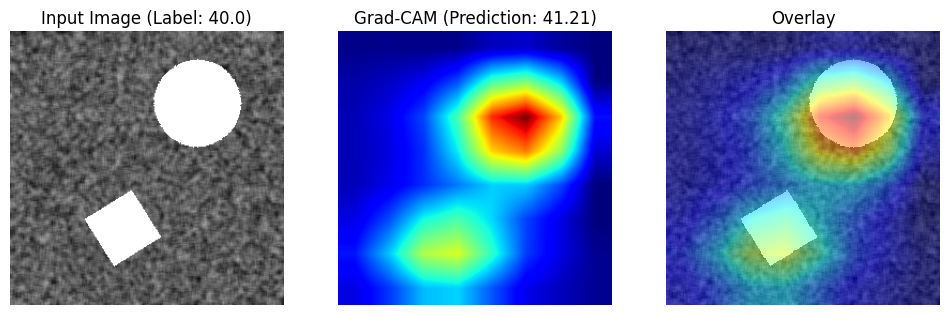

In [35]:
from src.XAI.GradCam import GradCamResnet
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = GradCamResnet(resnet)
grad_cam.generateMultipleGradCam(1, save_output=True, save_dir='gradcam_output')

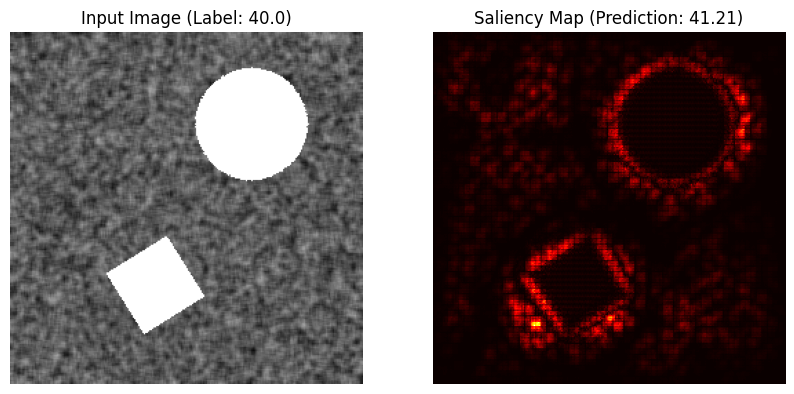

In [36]:
from src.XAI.VanillaSaliency import VanillaSaliency
importlib.reload(sys.modules['src.XAI.VanillaSaliency'])

# Assuming XAIResNet was already imported previously

# Initialize XAI instance
xai_resnet = VanillaSaliency(modelWrapper=resnet, device=resnet.device)
xai_resnet.get_saliency_maps(image_count=1)

Feature map mean: -134.35757446289062
Gradient mean: 2.549941200413741e-06


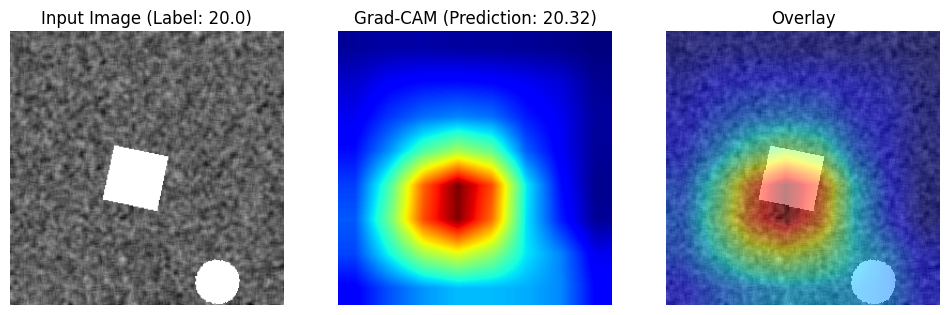

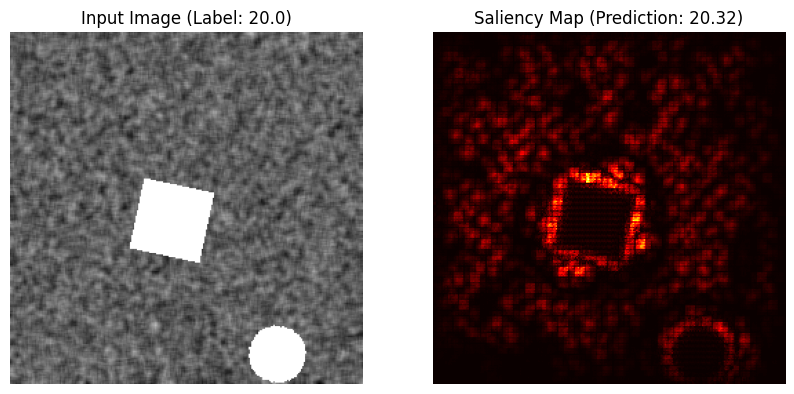

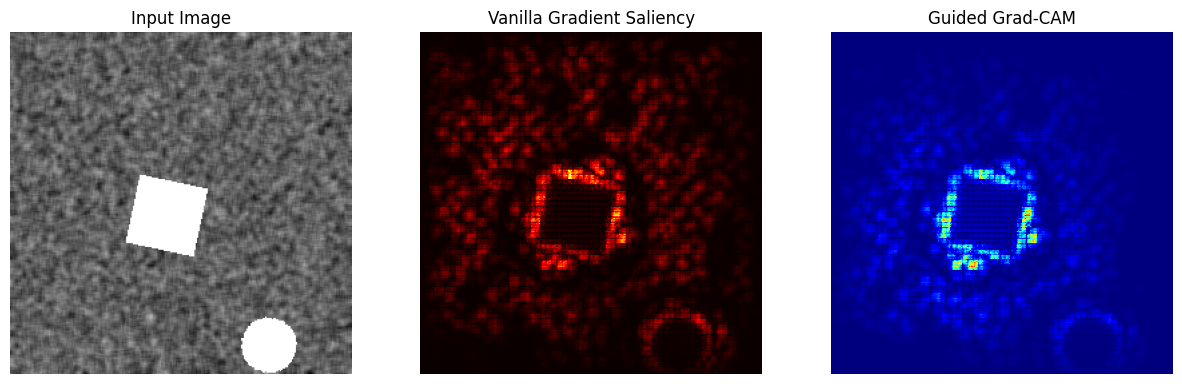

In [38]:
from src.XAI.GuideGradCam import GuidedGradCam
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.VanillaSaliency'])
importlib.reload(sys.modules['src.XAI.GuideGradCam'])


# Assuming XAIResNet was alreFady imported previously

# Initialize XAI instance
guidedGradCam = GuidedGradCam(grad_cam=grad_cam, vanilla_saliency=xai_resnet)
guidedGradCam.generate_guided_grad_cam(index=2)